# Mega Case Study - Make a Hybrid Deep Learning Model

## Part 1 - Identify the Frauds with the Self-Organizing Map 

In [22]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Import dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,-1].values 

In [24]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)
X

array([[ 0.84268147,  1.        ,  0.12526316, ...,  0.5       ,
         0.05      ,  0.01212   ],
       [ 0.69609056,  0.        ,  0.13413534, ...,  0.5       ,
         0.08      ,  0.        ],
       [ 0.38898166,  0.        ,  0.23804511, ...,  0.5       ,
         0.14      ,  0.        ],
       ..., 
       [ 0.43942033,  0.        ,  0.07639098, ...,  0.5       ,
         0.05      ,  0.        ],
       [ 0.84403493,  0.        ,  0.20556391, ...,  0.5       ,
         0.06      ,  0.00011   ],
       [ 0.10690789,  1.        ,  0.40977444, ...,  0.        ,
         0.28      ,  0.        ]])

In [25]:
# Training SOM
from minisom import MiniSom 
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

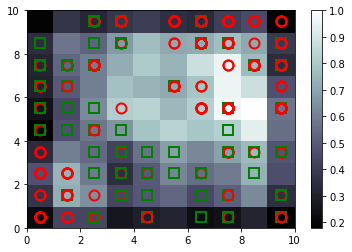

In [26]:
# Visualize results
from pylab import bone, pcolor, colorbar, plot, show
%matplotlib inline
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r','g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, 
         w[1]+0.5, 
         markers[y[i]],
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 2)
show;

In [43]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,7)], mappings[(8,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

## Part 2 - Going from Unsupervised to Supervised Deep Learning

In [44]:
# Creating matrix of features
customers = dataset.iloc[:,1:].values

In [45]:
# Creating the dependent variable
is_fraud = np.zeros(len(dataset))

In [46]:
for i in range(len(customers)): 
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [47]:
is_fraud

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [49]:
from keras.models import Sequential
from keras.layers import Dense

In [50]:
classifier = Sequential()

In [51]:
classifier.add(Dense(units = 2, kernel_initializer='uniform', activation='relu', input_dim = 15))

In [52]:
classifier.add(Dense(units = 1, kernel_initializer='uniform', activation='sigmoid'))

In [53]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [54]:
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 1s 1ms/step - loss: 0.4097 - acc: 0.9986
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.0711 - acc: 1.0000


In [55]:
y_pred = classifier.predict(customers)
y_pred

array([[ 0.03458671],
       [ 0.02645935],
       [ 0.01566412],
       ..., 
       [ 0.02803188],
       [ 0.01902299],
       [ 0.09035506]], dtype=float32)

In [56]:
y_pred = np.concatenate((dataset.iloc[:, 0:1], y_pred),axis = 1)
y_pred

array([[ 15776156.        ,         0.03458671],
       [ 15739548.        ,         0.02645935],
       [ 15662854.        ,         0.01566412],
       ..., 
       [ 15675450.        ,         0.02803188],
       [ 15776494.        ,         0.01902299],
       [ 15592412.        ,         0.09035506]])

In [61]:
np.set_printoptions(threshold=50, precision = 4)

In [62]:
y_pred = y_pred[y_pred[:,1].argsort()]
y_pred

array([[ 15799785.    ,         0.0012],
       [ 15621423.    ,         0.0015],
       [ 15654859.    ,         0.0044],
       ..., 
       [ 15645820.    ,         0.1314],
       [ 15594133.    ,         0.1411],
       [ 15725776.    ,         0.1982]])